# Scikit-learn (sklearn)

* Powerful free and open-source (BSD license) machine learning library.
* Built on NumPy, SciPy, and matplotlib.
* Comprehensive Algorithms: Classification, Regression, Clustering, Dimensionality Reduction, Preprocessing, Model Selection, Feature Selection...
* Simple model interface:
    * `model = XXX()` &rarr; `model.fit(X, y)` &rarr; `model.predict(X_new)`
* Compatible with NumPy and Pandas data.
* Includes some ready to use popular reference datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from IPython.display import HTML
HTML("""
<style>
.dataframe {
    font-size: 80% !important; /* Adjust the percentage as needed */
}
</style>
""")

## Selecting a multiclass classification dataset

### MNIST database (Modified National Institute of Standards and Technology)
<center><img src="img/MNIST.jpg" alt="MNIST" style="width: 60%;"/></center>

In [23]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", data_home='~/.cache/scikit_learn_data', as_frame=False)

In [24]:
#mnist.

In [3]:
print(f'{type(mnist.data)=} {type(mnist.target)=}')
print(f'{mnist.data.shape=} {mnist.target.shape=}')
print(f'{mnist.data.max()=} {mnist.data.min()=}')
print(f'{np.unique(mnist.target)=}')

type(mnist.data)=<class 'numpy.ndarray'> type(mnist.target)=<class 'numpy.ndarray'>
mnist.data.shape=(70000, 784) mnist.target.shape=(70000,)
mnist.data.max()=255 mnist.data.min()=0
np.unique(mnist.target)=array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)


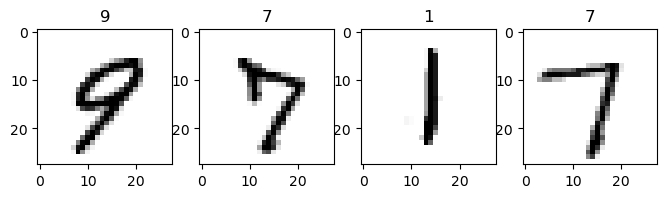

In [4]:
plt.figure(figsize = (8,2))
for i,idx in enumerate(np.random.randint(0,mnist.data.shape[0],4)):
    plt.subplot(1, 4, i+1)
    plt.imshow(mnist.data[idx].reshape(28,28), cmap=plt.cm.gray_r)
    plt.title(mnist.target[idx])

In [5]:
mnist.data = mnist.data / mnist.data.max()
mnist.target = mnist.target.astype('int')
print(f'{mnist.data.shape=} {mnist.target.shape=}')
print(f'{mnist.data.max()=} {mnist.data.min()=}')
print(f'{np.unique(mnist.target)=}')

mnist.data.shape=(70000, 784) mnist.target.shape=(70000,)
mnist.data.max()=1.0 mnist.data.min()=0.0
np.unique(mnist.target)=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [6]:
X_train, X_test, y_train, y_test = \
    train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

In [7]:
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def check_accuracy(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

check_accuracy(X_train, X_test, y_train, y_test)

Accuracy: 0.92


### Fashion MNIST (Fashion Modified National Institute of Standards and Technology database)
<center><img src="img/Fashion-MNIST.webp" alt="Fashion MNIST" style="width: 60%;"/></center>

In [8]:
#!pip install kagglehub
import kagglehub
path = kagglehub.dataset_download("zalando-research/fashionmnist")
print(path)

/home/jupyter-mpenagaricano/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [9]:
train_df = pd.read_csv(path + '/fashion-mnist_train.csv')
test_df = pd.read_csv(path + '/fashion-mnist_test.csv')
print(train_df.shape , test_df.shape)
train_df.head()

(60000, 785) (10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train = train_df.drop('label', axis=1).to_numpy()
y_train = train_df['label'].to_numpy()
X_test = test_df.drop('label', axis=1).to_numpy()
y_test = test_df['label'].to_numpy()
print(f'{X_train.shape=} {y_train.shape=}')
print(f'{X_test.shape=} {y_test.shape=}')
print(f'{X_train.max()=} {X_train.min()=}')
print(f'{X_test.max()=} {X_test.min()=}')
print(f'{np.unique(y_train)}')

X_train.shape=(60000, 784) y_train.shape=(60000,)
X_test.shape=(10000, 784) y_test.shape=(10000,)
X_train.max()=255 X_train.min()=0
X_test.max()=255 X_test.min()=0
[0 1 2 3 4 5 6 7 8 9]


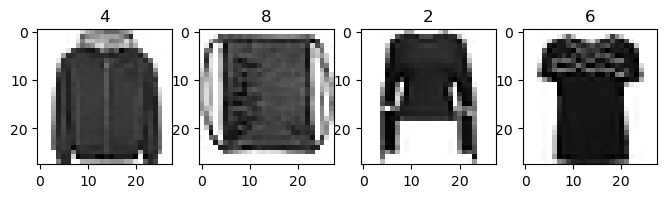

In [11]:
plt.figure(figsize = (8,2))
for i,idx in enumerate(np.random.randint(0,X_train.shape[0],4)):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[idx].reshape(28,28), cmap=plt.cm.gray_r)
    plt.title(f'{y_train[idx]}')

In [12]:
X_train = train_df.drop('label', axis=1).to_numpy() / 255
y_train = train_df['label'].to_numpy()
X_test = test_df.drop('label', axis=1).to_numpy() /255
y_test = test_df['label'].to_numpy()
print(f'{X_train.shape=} {y_train.shape=}')
print(f'{X_test.shape=} {y_test.shape=}')
print(f'{X_train.max()=} {X_train.min()=}')
print(f'{X_test.max()=} {X_test.min()=}')
print(f'{np.unique(y_train)}')

X_train.shape=(60000, 784) y_train.shape=(60000,)
X_test.shape=(10000, 784) y_test.shape=(10000,)
X_train.max()=1.0 X_train.min()=0.0
X_test.max()=1.0 X_test.min()=0.0
[0 1 2 3 4 5 6 7 8 9]


In [13]:
check_accuracy(X_train, X_test, y_train, y_test)

Accuracy: 0.86


<hr>
<hr>

In [19]:
from collections import namedtuple
MyDataset = namedtuple('MyDataset', 'X_train X_test y_train y_test')
fmnist = MyDataset(X_train, X_test, y_train, y_test)
fmnist_mini = MyDataset(X_train[:6000,:], X_test[:1000,:], y_train[:6000], y_test[:1000])

In [20]:
@ignore_warnings(category=ConvergenceWarning)
def check_accuracy(ds):
    model = LogisticRegression()
    model.fit(ds.X_train, ds.y_train)
    y_pred = model.predict(ds.X_test)
    print(f'Accuracy: {accuracy_score(ds.y_test, y_pred):.2f}')

In [21]:
check_accuracy(fmnist)

Accuracy: 0.86


In [22]:
check_accuracy(fmnist_mini)

Accuracy: 0.82
